Based on the trend analysis section from this link: https://podaac.jpl.nasa.gov/forum/viewtopic.php?f=87&t=358

In [6]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np
import os
import glob
import calendar

Setup Global Variables

In [2]:
# dimensions of the variable
nlat = 2946
nlon = 2718

# not relevant for me at the moment since just looked at 2 example images
#startY = 1982   
#endY = 1983

Calculate how many days of data files

In [3]:
#nt = 0
#for i in range(startY,endY+1):
#   if calendar.isleap(i):
#     nt = nt + 366
#   else:
#     nt = nt + 365

# Didn't try the above part since I am testing only on two files, so I hardcoded the nt value.
nt = 2


Create empty array to contain the turbidity values from all files

In [8]:
# don't understand why divide by 2, but it works!
tur_all=np.empty((nt,int(nlat/2),int(nlon/2)))
tur_all.shape

(2, 1473, 1359)

Pre-define latitude and longitude grid

In [ ]:
# maybe we don't need this part since we have lat, lon as variables in the netcdf. Not sure why they did this
lats = [-89.875+0.5*x for x in range(0, nlat//2)]
lons = [-179.875+0.5*x for x in range(0, nlon//2)]

Read turbidity from all files using the netCDF4 module.

In [9]:
idx = 0
for filename in glob.glob('D:/hackathon/Acolite/test/*.nc'):  # test lcoation with 2 example .nc files
    ncin = Dataset(filename, 'r')
    tur = ncin.variables['t_nechad2016'][:]
    print(np.nanmean(tur))
    tur_all[idx,:,:] = tur[0:nlat:2,0:nlon:2]
    ncin.close()
    idx = idx + 1

3.5759747
3.0302498


Linear trend calculation

In [12]:
tur=np.empty((idx))
x = range(idx)
tur_rate=np.empty((nlat//2,nlon//2))

for i in range(nlon//2):
  for j in range(nlat//2):
    tur[:] = tur_all[0:idx,j,i]
    try:
        z = np.polyfit(x, tur, 1)
        tur_rate[j,i] = z[0]*3650.0 # for decadel, 365*10
    except:
        tur_rate[j,i] = 0 # using 'try' and this zero value to try and deal with all the NaNs that were causing the linear regression to fail

In [11]:
np.nanmean(tur_rate)

NameError: name 'tur_rate' is not defined

Plot the result

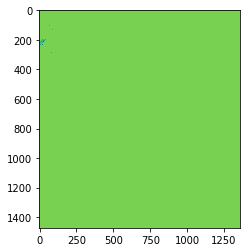

In [113]:
imgplot = plt.imshow(tur_rate) # my attempts at  a basic plot

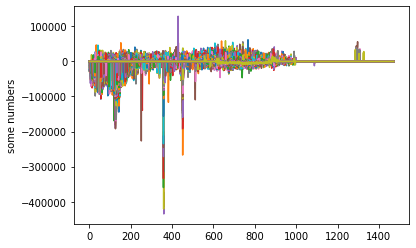

In [13]:
plt.plot(tur_rate)
plt.ylabel('some numbers')
plt.show()

In [99]:
# Don't have basemap so this didn't work

plt.figure()

m = Basemap(projection='cyl', llcrnrlon=min(lons), llcrnrlat=min(lats),
        urcrnrlon=max(lons), urcrnrlat=max(lats))
x, y = m(*np.meshgrid(lons, lats))
clevs = np.linspace(-0.5, 0.5, 21)
cs=m.contourf(x, y, sst_rate.squeeze(), clevs, cmap=plt.cm.RdBu_r)
m.drawcoastlines()
m.fillcontinents(color='#000000',lake_color='#99ffff')

cb = plt.colorbar(cs, orientation='horizontal')
cb.set_label('SST Changing Rate (deg/decade)', fontsize=12)
plt.title('SST Changing Rate (degC/decade)', fontsize=16)

plt.show()


NameError: name 'm' is not defined

<Figure size 432x288 with 0 Axes>